# Experiment
In this notebook we compare the performance of DSH, UCB, Uniform and AT-LUCB in the synthesis setting. We aims to reproduce the Figure 2 sparse setting in Jun&Nowak 2016

In [1]:
# import packages
import numpy as np
from Source.env import Env_FixedConsumption_Gaussian
from Source.agent import *

## Uniform

In [2]:
# setting
K = 1000
demand = np.ones(K) # fixed consumption
m = 1
mu = np.zeros(K)
mu[0] = 0.5
n_experiment = 200
experiment_length = 15000

In [3]:
# run the experiment
from tqdm import tqdm

result = np.zeros((n_experiment, experiment_length))
predict = np.zeros((n_experiment, experiment_length))
best_arm_ = np.zeros(n_experiment)
for exp_index in tqdm(range(n_experiment)):
    np.random.seed(exp_index)
    
    # shuffle the best arms
    permutation_index = np.arange(0, K)
    np.random.shuffle(permutation_index)
    temp_mu = mu[permutation_index]
    temp_demand = demand[permutation_index]
    
    # identify the best arm
    best_arm = np.argmax(temp_mu)+1
    best_arm_[exp_index] = best_arm
    
    # run the experiments
    env = Env_FixedConsumption_Gaussian(r_list=temp_mu, d_list=temp_demand, K=K, C=999999, random_seed=exp_index)
    agent = Uniform_Agent(K=K, C=999999)
    for round_index in range(experiment_length):
        arm = agent.action()
        d, r = env.response(arm)
        agent.observe(demand=d, reward=r)
        
        J_t = agent.predict()
        predict[exp_index, round_index] = J_t
        result[exp_index, round_index] = J_t != best_arm

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:39<00:00,  5.12it/s]


In [6]:
# save the result
np.save("./Numeric-Record/Uniform-Figure2-m_1-sparse_Failure.npy", result)
np.save("./Numeric-Record/Uniform-Figure2-m_1-sparse_predict.npy", predict)
np.save("./Numeric-Record/Uniform-Figure2-m_1-sparse_best-arm.npy", best_arm_)

## Doubling Trick on Sequential Halving

In [7]:
# setting
K = 1000
demand = np.ones(K) # fixed consumption
m = 1
mu = np.zeros(K)
mu[0] = 0.5
n_experiment = 200
experiment_length = 15000

In [8]:
# run the experiment
from tqdm import tqdm

result = np.zeros((n_experiment, experiment_length))
predict = np.zeros((n_experiment, experiment_length))
best_arm_ = np.zeros(n_experiment)
for exp_index in tqdm(range(n_experiment)):
    np.random.seed(exp_index)
    
    # shuffle the best arms
    permutation_index = np.arange(0, K)
    np.random.shuffle(permutation_index)
    temp_mu = mu[permutation_index]
    temp_demand = demand[permutation_index]
    
    # identify the best arm
    best_arm = np.argmax(temp_mu)+1
    best_arm_[exp_index] = best_arm
    
    # run the experiments
    env = Env_FixedConsumption_Gaussian(r_list=temp_mu, d_list=temp_demand, K=K, C=999999, random_seed=exp_index)
    agent = DoublingSequentialHalving_ATMean_Agent(K=K, C=999999)
    for round_index in range(experiment_length):
        arm = agent.action()
        d, r = env.response(arm)
        agent.observe(demand=d, reward=r)
        
        J_t = agent.predict()
        predict[exp_index, round_index] = J_t
        result[exp_index, round_index] = J_t != best_arm

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:07<00:00,  2.97it/s]


In [9]:
# save the result
np.save("./Numeric-Record/DSH-Figure2-m_1-sparse_Failure.npy", result)
np.save("./Numeric-Record/DSH-Figure2-m_1-sparse_predict.npy", predict)
np.save("./Numeric-Record/DSH-Figure2-m_1-sparse_best-arm.npy", best_arm_)

## UCB

In [10]:
# setting
K = 1000
demand = np.ones(K) # fixed consumption
m = 1
mu = np.zeros(K)
mu[0] = 0.5
n_experiment = 200
experiment_length = 15000

In [11]:
# run the experiment
from tqdm import tqdm

result = np.zeros((n_experiment, experiment_length))
predict = np.zeros((n_experiment, experiment_length))
best_arm_ = np.zeros(n_experiment)
for exp_index in tqdm(range(n_experiment)):
    np.random.seed(exp_index)
    
    # shuffle the best arms
    permutation_index = np.arange(0, K)
    np.random.shuffle(permutation_index)
    temp_mu = mu[permutation_index]
    temp_demand = demand[permutation_index]
    
    # identify the best arm
    best_arm = np.argmax(temp_mu)+1
    best_arm_[exp_index] = best_arm
    
    # run the experiments
    env = Env_FixedConsumption_Gaussian(r_list=temp_mu, d_list=temp_demand, K=K, C=999999, random_seed=exp_index)
    agent = UCB_Agent(K=K, C=999999)
    for round_index in range(experiment_length):
        arm = agent.action()
        d, r = env.response(arm)
        agent.observe(demand=d, reward=r)
        
        J_t = agent.predict()
        predict[exp_index, round_index] = J_t
        result[exp_index, round_index] = J_t != best_arm

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:26<00:00,  2.32it/s]


In [12]:
# save the result
np.save("./Numeric-Record/UCB-Figure2-m_1-sparse_Failure.npy", result)
np.save("./Numeric-Record/UCB-Figure2-m_1-sparse_predict.npy", predict)
np.save("./Numeric-Record/UCB-Figure2-m_1-sparse_best-arm.npy", best_arm_)

## AT-LUCB

In [13]:
# setting
K = 1000
demand = np.ones(K) # fixed consumption
m = 1
mu = np.zeros(K)
mu[0] = 0.5
n_experiment = 200
experiment_length = 15000

In [14]:
# run the experiment
from tqdm import tqdm

result = np.zeros((n_experiment, experiment_length))
predict = np.zeros((n_experiment, experiment_length))
best_arm_ = np.zeros(n_experiment)
for exp_index in tqdm(range(n_experiment)):
    np.random.seed(exp_index)
    
    # shuffle the best arms
    permutation_index = np.arange(0, K)
    np.random.shuffle(permutation_index)
    temp_mu = mu[permutation_index]
    temp_demand = demand[permutation_index]
    
    # identify the best arm
    best_arm = np.argmax(temp_mu)+1
    best_arm_[exp_index] = best_arm
    
    # run the experiments
    env = Env_FixedConsumption_Gaussian(r_list=temp_mu, d_list=temp_demand, K=K, C=999999, random_seed=exp_index)
    agent = AT_LUCB_Agent(K=K, C=999999, delta_1=0.5, alpha=0.99, epsilon=0., m=m)
    for round_index in range(experiment_length):
        arm = agent.action()
        d, r = env.response(arm)
        agent.observe(demand=d, reward=r)
        
        J_t = agent.predict()
        predict[exp_index, round_index] = J_t
        result[exp_index, round_index] = J_t != best_arm

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [2:58:08<00:00, 53.44s/it]


In [15]:
# save the result
np.save("./Numeric-Record/AT-LUCB-Figure2-m_1-sparse_Failure.npy", result)
np.save("./Numeric-Record/AT-LUCB-Figure2-m_1-sparse_predict.npy", predict)
np.save("./Numeric-Record/AT-LUCB-Figure2-m_1-sparse_best-arm.npy", best_arm_)

## Plot the figure

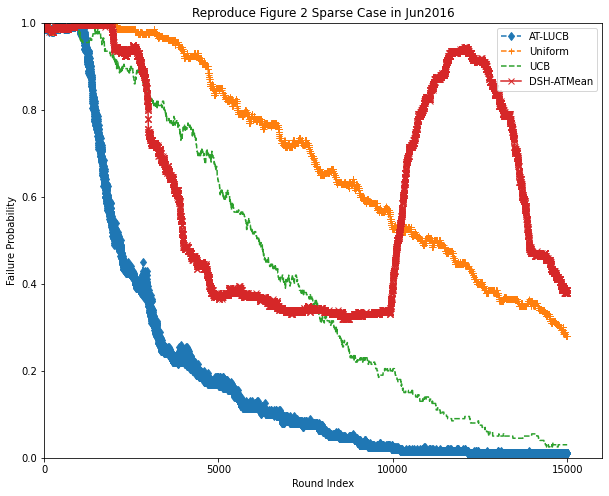

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
# index = np.arange(0, 15000, 100)
index = np.arange(0, 15000, 1)

# result = np.load("./Reproduce_Jun2016/Debug-AT-LUCB-Figure2-m_1-sparse_result.npy")
# plt.plot(np.mean(result, axis=0), "o-", label="AT-LUCB")
# result = np.load("./Reproduce_Jun2016/Debug-Uniform-Figure2-m_1-sparse_result.npy")
# plt.plot(np.mean(result, axis=0), "x-", label="Uniform")
# result = np.load("./Reproduce_Jun2016/Debug-UCB-Figure2-m_1-sparse_result.npy")
# plt.plot(np.mean(result, axis=0), ".-", label="UCB")

result = np.load("./Numeric-Record/AT-LUCB-Figure2-m_1-sparse_Failure.npy")
plt.plot(index, np.mean(result, axis=0)[index], "d--", label="AT-LUCB")
result = np.load("./Numeric-Record/Uniform-Figure2-m_1-sparse_Failure.npy")
plt.plot(index, np.mean(result, axis=0)[index], "+--", label="Uniform")
result = np.load("./Numeric-Record/UCB-Figure2-m_1-sparse_Failure.npy")
plt.plot(index, np.mean(result, axis=0)[index], "--", label="UCB")
result = np.load("./Numeric-Record/DSH-Figure2-m_1-sparse_Failure.npy")
plt.plot(index, np.mean(result, axis=0)[index], "x-", label="DSH-ATMean")

plt.legend()
plt.title("Reproduce Figure 2 Sparse Case in Jun2016")
plt.ylim(bottom=0., top=1.)
plt.xlim(left=0, right=16000)
plt.xticks(np.arange(0, 16000, 5000))
plt.ylabel("Failure Probability")
plt.xlabel("Round Index")
plt.show()